In [1]:
from simulation import *
import numpy as np
import matplotlib.pyplot as plt


def sim_vlad_probability(S):
    return 50 * (S[2] + 1)


def theory_vlad_probability(Hx, H_dot):
    return np.exp(-np.pi * Hx * Hx / H_dot * -0.09162) * 100



Final S (two wires): [0.0, -0.6682047135397682, 0.7439771503034246]


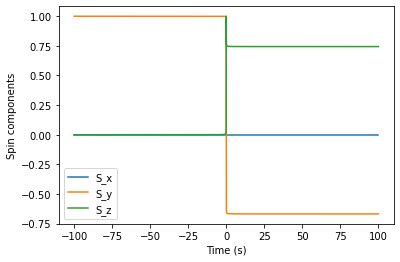

In [2]:
Sf, ts, spins = Particle(
    [1000, 0, 0],
    np.zeros(3),
    generate_two_wires(10, (10, 0), (-10, 0)),
    [-100, 100],
    [0, 1, 0],
).simulate_with_output()
print(f"Final S (two wires): {Sf}")
plt.plot(ts, list(zip(*spins)), label=("S_x", "S_y", "S_z"))
plt.xlabel("Time (s)")
plt.ylabel("Spin components")
plt.legend()
plt.show()


Final S (Vladimirskii): [0.07625445246664814, 0.9970861336744352, 0.003762795417459164]
Corresponding realignment probability: 50.18813977087295%
Theoretical realignment probability: 49.97872272254392%


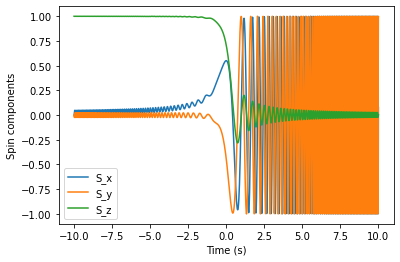

In [3]:
Hx = 10
H_dot = -41.5
Sf, ts, spins = Particle(
    np.empty(3), np.empty(3), [Vladimirskii(Hx, H_dot)], [-10, 10], [0, 0, 1]
).simulate_with_output()
print(f"Final S (Vladimirskii): {Sf}")
print(f"Corresponding realignment probability: {sim_vlad_probability(Sf)}%")
print(f"Theoretical realignment probability: {theory_vlad_probability(Hx, H_dot)}%")
plt.plot(ts, list(zip(*spins)), label=("S_x", "S_y", "S_z"))
plt.xlabel("Time (s)")
plt.ylabel("Spin components")
plt.legend()
plt.show()


In [4]:
shape = "line"
Sf = rand_shape_sim(
    1000, 10, generate_two_wires(10, (10, 0), (-10, 0)), 100, [-100, 100], shape
)
print(f"Final S ({shape}): {Sf}")

shape = "square"
Sf = rand_shape_sim(
    1000, 10, generate_two_wires(10, (10, 0), (-10, 0)), 100, [-100, 100], shape
)
print(f"Final S ({shape}): {Sf}")


Final S (line): [ 0.86606502 -0.03627929 -0.05359309]
Final S (square): [ 0.83690473 -0.00174971 -0.00837011]


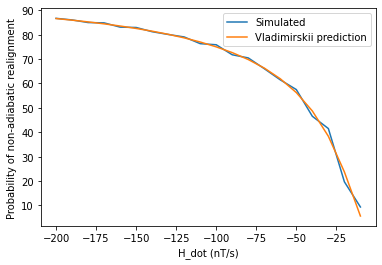

In [5]:
Hx = 10
H_dots = np.linspace(-10, -200, 20)
sim_ps = [
    sim_vlad_probability(
        Particle(
            np.empty(3),
            np.empty(3),
            [Vladimirskii(Hx, H_dot)],
            [-10, 10],
            [0, 0, 1],
        ).simulate()
    )
    for H_dot in H_dots
]

vlad_ps = [theory_vlad_probability(Hx, H_dot) for H_dot in H_dots]

plt.plot(H_dots, sim_ps, label="Simulated")
plt.plot(H_dots, vlad_ps, label="Vladimirskii prediction")
plt.xlabel("H_dot (nT/s)")
plt.ylabel("Probability of non-adiabatic realignment")
plt.legend()
plt.show()


Final S (two wires, particle offset closer to top wire): [-0.08735400424031332, 0.9931222835729916, 0.07795298299791759]


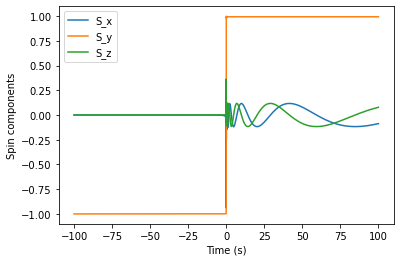

In [6]:
Sf, ts, spins = Particle(
    [5, 0, 0],
    [0, 4.5 / 100, 0],
    generate_two_wires(5 / 100, (0.3, 0), (0.3, 0)),
    [-100, 100],
).simulate_with_output()
print(f"Final S (two wires, particle offset closer to top wire): {Sf}")
plt.plot(ts, list(zip(*spins)), label=("S_x", "S_y", "S_z"))
plt.xlabel("Time (s)")
plt.ylabel("Spin components")
plt.legend()
plt.show()


Final S (two wires, particle offset closer to top wire, faster): [0.33223344714498293, -0.7801738237958111, -0.5300469683788319]


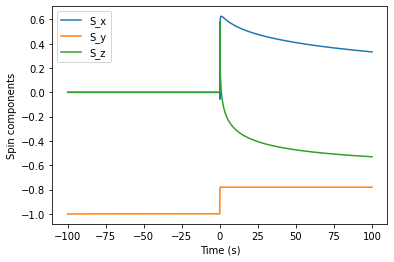

In [7]:
Sf, ts, spins = Particle(
    [100, 0, 0],
    [0, 4.5 / 100, 0],
    generate_two_wires(5 / 100, (0.3, 0), (0.3, 0)),
    [-100, 100],
).simulate_with_output()
print(f"Final S (two wires, particle offset closer to top wire, faster): {Sf}")
plt.plot(ts, list(zip(*spins)), label=("S_x", "S_y", "S_z"))
plt.xlabel("Time (s)")
plt.ylabel("Spin components")
plt.legend()
plt.show()


Number of t evals: 5446
Final S (through Metglas): [-0.586379106961979, 0.7834930083216499, -0.20565819434017468]


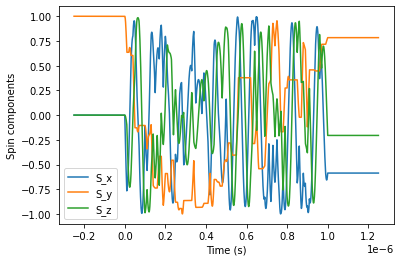

In [8]:
x_hat = np.array([1.0, 0, 0])
y_hat = np.array([0, 1.0, 0])
B_metglas = 5e8  # corresponds to 5e8 nT = 0.5 T
# B0 = 3000  # corresponds to 3000 nT = 3 microtesla
# incoming_region = OverridingBox(
#     [-100, -50, -50], [100, 100, 100], lambda r, t: B0 * y_hat
# )
# superconductor = OverridingBox(
#     [0, -50, -50], [8e-4, 100, 100], lambda r, t: np.zeros(3)
# )
# between_sc_metglas = OverridingBox(
#     [8e-4, -50, -50], [100, 100, 100], lambda r, t: -B0 / 1000 * y_hat
# )
# outging_region = OverridingBox(
#     [205, -50, -50], [100, 100, 100], lambda r, t: -B0 / 1000 * y_hat
# )
metglas = Metglas(
    [0, -50, -50], -B_metglas * y_hat, x_hat, 0.5, [1e-6, 100, 100], [100, 1, 1]
)
Sf, ts, spins = Particle(
    [100, 0, 0], [0, 0, 0], [metglas], [-0.00000025, 0.00000125], y_hat, 1e-4 / 100000
).simulate_with_output()
print(f"Number of t evals: {len(ts)}")
print(f"Final S (through Metglas): {Sf}")
plt.plot(ts, list(zip(*spins)), label=("S_x", "S_y", "S_z"))
plt.xlabel("Time (s)")
plt.ylabel("Spin components")
plt.legend()
plt.show()
